# **Data Mining: Preprocessing**
### Dataset: Housing

Dataset ini berisi data tentang pinggiran kota dan kota di sekitar Boston pada tahun 1970, mencakup atribut seperti tingkat kejahatan, proporsi lahan residensial, konsentrasi polusi udara, jumlah ruangan per tempat tinggal, dan nilai median rumah. Atribut-atribut ini memberikan gambaran tentang berbagai aspek demografis, geografis, dan ekonomi dari setiap wilayah, dengan campuran unit yang berbeda untuk setiap atribut.

## Subset Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Subset Dataset

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/FahdAby/T-Prepocessing-Housing-Data/master/Housing.csv")
df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...
504,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,22.4
505,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,20.6
506,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,23.9
507,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,22.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      507 non-null    float64
 3   RM       509 non-null    float64
 4   AGE      508 non-null    float64
 5   DIS      509 non-null    float64
 6   RAD      508 non-null    float64
 7   PTRATIO  509 non-null    float64
 8   B        509 non-null    float64
 9   MEDV     509 non-null    float64
dtypes: float64(10)
memory usage: 39.9 KB


In [31]:
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,MEDV
count,509.000000,506.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000
mean,3.707516,11.198281,0.555216,6.279845,68.579134,3.787705,9.610236,18.463851,356.664892,22.501572
std,8.732089,6.856713,0.115633,0.703449,28.114744,2.101852,8.735069,2.161553,91.562469,9.183497
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,12.600000,0.320000,5.000000
25%,0.082210,5.190000,0.449000,5.880000,45.075000,2.100700,4.000000,17.400000,375.330000,17.000000
50%,0.261690,9.690000,0.538000,6.202000,77.150000,3.182700,5.000000,19.100000,391.450000,21.200000
75%,3.693110,18.100000,0.624000,6.619000,94.100000,5.118000,24.000000,20.200000,396.240000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,22.000000,396.900000,50.000000


## **Data Cleaning**
---

### Handle Missing Values

In [32]:
variables = df.columns.tolist()

def scan_missval(data):
  return data[variables].isnull().sum()

scan_missval(df)

CRIM       0
INDUS      3
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
PTRATIO    0
B          0
MEDV       0
dtype: int64

__Interpretasi :__
Dari pengecekan outlier diatas didapatkan bahwa 4 dari 10 variabel terdapat missing value. Seperti pada variabel INDUS sebanyak 3, NOX sebanyak 2, AGE sebanyak 1 dan RAD sebanyak 1.

In [33]:
# Replace missing values with median for each variables
for var in variables:
    df[var].fillna(df[var].median(), inplace=True)

scan_missval(df)

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

__Interpretasi :__
Untuk mengatasi missing value tersebut kami menggunakan imputasi nilai dengan nilai median dari data. Kami menggunakan imputasi dengan nilai median karena Nilai median lebih tahan terhadap outlier dibandingkan dengan nilai rata-rata (mean). 

### Handle Outlier

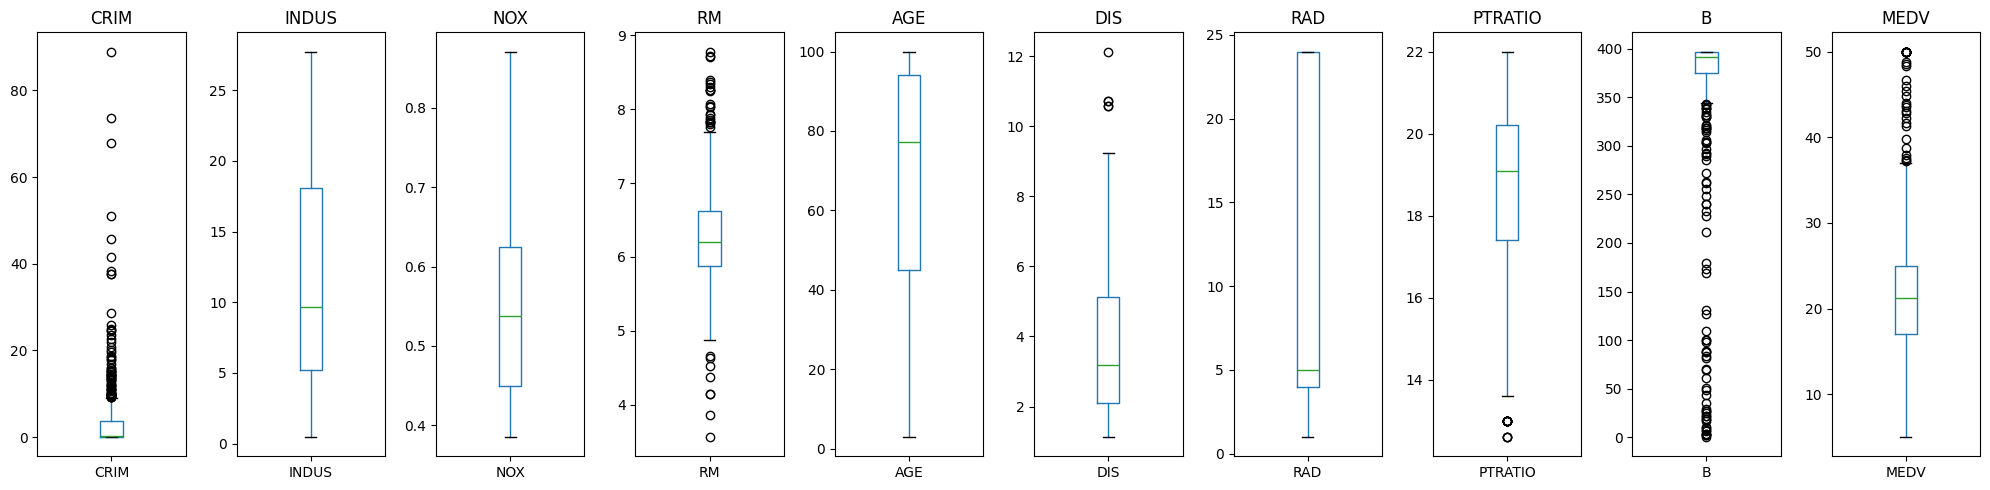

In [34]:
def show_boxplots(data):
    fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(20, 5))

    for i, column in enumerate(data.columns):
        data.boxplot(column=column, ax=axes[i], grid=False)
        axes[i].set_title(column)
        axes[i].set_ylabel('')

    plt.tight_layout()
    plt.show()

show_boxplots(df)

In [66]:
from scipy.stats import zscore

z_scores = df.apply(zscore)
threshold = 3 

outliers_count = (np.abs(z_scores) > threshold).sum()

print("Jumlah outlier pada tiap variabel dengan metode z-score:")
print(outliers_count)


Jumlah outlier pada tiap variabel dengan metode z-score:
CRIM        9
INDUS       0
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
PTRATIO     0
B          26
MEDV        0
dtype: int64


__Interpretasi :__
Dari perhitungan z score yang sudah dilakukan didapatkan bahwa terdapat 4 dari 10 variabel yang terdapat outlier. Seperti pada CRIM sebanyak 9, RM sebanyak 8, DIS sebanyak 5,dan B sebanyak 26.

In [67]:
df_cleaned = df[(z_scores < threshold).all(axis=1)]

df_cleaned

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...
504,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,22.4
505,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,20.6
506,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,23.9
507,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,22.0


__Interpretasi :__
Setelah dilakukan pengecekan kami mengatasi outlier tersebut dengan menghapus outlier tersebut berdasarkan z score nya, dimana jika nilai z-score dari setiap fitur dalam baris tertentu semuanya kurang dari threshold, maka baris tersebut akan dimasukkan ke dalam df_cleaned.

## **Data Transformation**
---

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print("Scaled DataFrame:")
print(df_scaled)

Scaled DataFrame:
         CRIM     INDUS       NOX        RM       AGE       DIS       RAD  \
0    0.000000  0.067815  0.314815  0.626091  0.641607  0.365784  0.000000   
1    0.000733  0.242302  0.172840  0.594101  0.782698  0.474158  0.043478   
2    0.000732  0.242302  0.172840  0.752804  0.599382  0.474158  0.043478   
3    0.000909  0.063050  0.150206  0.713959  0.441813  0.609467  0.086957   
4    0.002190  0.063050  0.150206  0.744911  0.528321  0.609467  0.086957   
..        ...       ...       ...       ...       ...       ...       ...   
486  0.001965  0.420455  0.386831  0.629830  0.681771  0.166681  0.000000   
487  0.001360  0.420455  0.386831  0.531575  0.760041  0.143069  0.000000   
488  0.001900  0.420455  0.386831  0.709389  0.907312  0.128242  0.000000   
489  0.003605  0.420455  0.386831  0.671583  0.889804  0.155598  0.000000   
490  0.001434  0.420455  0.386831  0.512879  0.802266  0.169943  0.000000   

      PTRATIO         B      MEDV  
0    0.313953  1.0000

__Interpretasi :__
Dalam proses data transformasi ini, kami meggunakan metode min-max. Metode Min-Max Scaler sendiri melakukan normalisasi data ke dalam rentang tertentu, misalnya antara 0 dan 1. Ini mempertahankan interpretasi relatif dari nilai-nilai dalam dataset, karena nilai-nilai tetap dalam rentang yang sama, hanya skala yang berubah.

## **Data Reduction**
---

In [59]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

explained_vr = pca.explained_variance_ratio_
cumulative_vr = explained_vr.cumsum()

var_ratio = pd.DataFrame({'': variables, 'Explained Var. Ratio': explained_vr, 'Cumulative Var. Ratio': cumulative_vr})
print(var_ratio.to_string(index=False, formatters={'Explained Var. Ratio': '{:.6f}'.format, 'Cumulative Var. Ratio': '{:.6f}'.format}))

        Explained Var. Ratio Cumulative Var. Ratio
   CRIM             0.554072              0.554072
  INDUS             0.135195              0.689267
    NOX             0.094688              0.783955
     RM             0.066353              0.850308
    AGE             0.047023              0.897330
    DIS             0.039131              0.936462
    RAD             0.023061              0.959523
PTRATIO             0.017863              0.977386
      B             0.012379              0.989765
   MEDV             0.010235              1.000000


In [60]:
var_ratio = var_ratio.iloc[:-3]
var_ratio

,,Explained Var. Ratio,Cumulative Var. Ratio
0,CRIM,0.554072,0.554072
1,INDUS,0.135195,0.689267
2,NOX,0.094688,0.783955
3,RM,0.066353,0.850308
4,AGE,0.047023,0.897330
5,DIS,0.039131,0.936462
6,RAD,0.023061,0.959523


__Interpretasi :__
Setelah dilakukan PCA didapatkan bahwa nilai Explained Variance Ratio dari variabel CRIM sebesar 0.55, yang berarti bahwa komponen utama pertama mampu menjelaskan sekitar 55% variasi tingkat kejahatan per kapita menurut kota.

Selain itu, 95% cumulative variance ratio sudah bisa didapatkan tanpa adanya atribut PTRATIO, B, dan MEDV.